In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from wordcloud import WordCloud
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [2]:
df = pd.read_csv("tickets.csv")

In [3]:
def take_main_fail(text):
    try:
        if text[0:4] == 'test':
            end_text = text.split(":")[2:]
        else:
            end_text = text.split(":")[1:]
    except:
        end_text = text
    
    return end_text

In [4]:
df["main_text"] = df["ticket"].apply(lambda x :take_main_fail(x))

In [5]:
df["len_texts"] = df["main_text"].apply(lambda x : len(x))

In [6]:
def make_text(x):
    if len(x) == 5:
        my_list = []
        for i in x:
            a = len(i)
            my_list.append(a)

        my_list.sort(reverse=True)
        main_list = my_list[:2]
        main_text = []
        for i in x:
            if main_list[0] == len(i):
                main_text.append(i)
            elif main_list[1] == len(i):
                main_text.append(i)

        return "nothing"
    elif len(x) == 6:
        return ' '.join(x[2:])
    elif len(x)==4:
        return x[0]
    elif len(x)==3:
        return x[0]
    elif len(x)==2:
        return ' '.join(x)
    elif len(x)==2:
        return x[0]
    else:
        return "nothing"

In [7]:
df["new"] = df["main_text"].apply(lambda x : make_text(x))

In [8]:
df1 = df[df["new"]!="nothing"]

In [9]:
df_problem_msg = df1.drop(["ticket","main_text","len_texts"],axis=1)

In [10]:
df_problem_msg["new1"] = df_problem_msg["new"].apply(lambda x : x.lower())

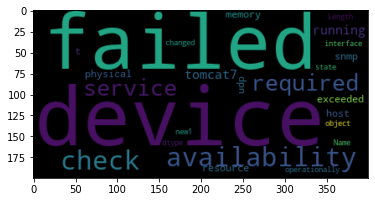

In [11]:
ws = WordCloud()
ws.generate(str(df_problem_msg["new1"]))
plt.imshow(ws, interpolation='bilinear')

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df_problem_msg["new1"])

Text(0.5, 1.0, 'Finding optimal K kluster')

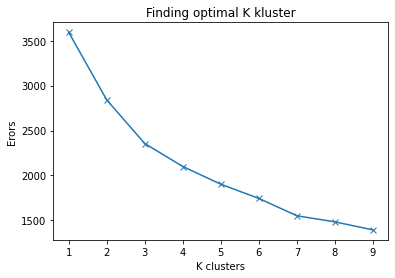

In [14]:
wss=[]
K=range(1,10)
for i in K:
    kmean=KMeans(n_clusters=i)
    kmean.fit(X.toarray())
    wss.append(kmean.inertia_)

plt.plot(K,wss,marker='x')
plt.xlabel('K clusters')
plt.ylabel('Erors')
plt.title("Finding optimal K kluster")

In [15]:
model = GaussianMixture(n_components=7)
labels = model.fit_predict(X.toarray())
df_problem_msg['clusters'] = labels

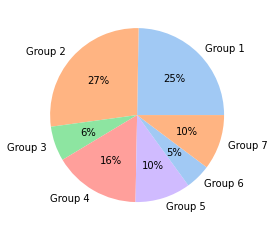

In [17]:
data = [int(df_problem_msg[df_problem_msg["clusters"]==0].shape[0]),int(df_problem_msg[df_problem_msg["clusters"]==1].shape[0]),int(df_problem_msg[df_problem_msg["clusters"]==2].shape[0]),int(df_problem_msg[df_problem_msg["clusters"]==3].shape[0]),int(df_problem_msg[df_problem_msg["clusters"]==4].shape[0]),int(df_problem_msg[df_problem_msg["clusters"]==5].shape[0]),int(df_problem_msg[df_problem_msg["clusters"]==6].shape[0])]
labels = ['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5','Group 6', 'Group 7']
colors = sns.color_palette('pastel')[0:5]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()